In [1]:
import argparse

import numpy as np
import tensorflow as tf
import keras.backend as K

import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.regularizers import l2

import glob
import os
import cv2
import keras


import time
import argparse

from tqdm import tqdm

from keras.models import load_model, Model


In [2]:
cd C:/Users/fjdur/Documents/utils/

C:\Users\fjdur\Documents\utils


In [3]:
import utils_guided_retraining as utils

2.5.0
keras
2.5.0


In [4]:
dataset = "mnist"

In [5]:
x_test,y_test = utils.get_data(dataset,"Test")

In [6]:
x_train_and_adversary,y_train_and_adversary = utils.get_data(dataset,"Train_and_adversary")

In [7]:
x_test_and_adversary,y_test_and_adversary = utils.get_adversarial_data(dataset,'Test_adversarial') 

In [8]:

model_dir = "C:/Users/fjdur/Documents/upc-july/models/tf_model_25-06/"
if(dataset == 'gtsrb'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/tf_model_25-06"
elif(dataset == 'intel'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/intel_model_21_10"
elif(dataset == 'mnist'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/models2"
elif(dataset == 'cifar'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/model_02"


In [9]:
print(model_dir)
model_original = utils.My_model(dataset,True, model_dir)

C:/Users/fjdur/Documents/upc-july/models/models2
Model loaded correctly


## Loading models

In [10]:
data_dir = "D:/models/aug_22"

config = "C1"
config_lc = "c1"
num_models = 20

In [14]:
loading = True

models_lsa = []

if loading:
    for i in range(num_models):
        model_lsa_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_lsa_e1_"+str(i)
        print(model_lsa_dir)
        model =utils.My_model(dataset,True,model_lsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_lsa.append(model)
       
    

D:/models/aug_22/mnist/C1/mnist_model_c1_aug_lsa_e1_0
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_lsa_e1_1
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_lsa_e1_2
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_lsa_e1_3
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_lsa_e1_4
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_lsa_e1_5
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_lsa_e1_6
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_lsa_e1_7
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_lsa_e1_8
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_lsa_e1_9
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_lsa_e1_10
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_lsa_e1_11
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_lsa_e1_12
Model loaded correc

In [ ]:
len(models_lsa)

In [15]:
loading = True

models_dsa = []

if loading:
    for i in range(num_models):
        #model_dsa_dir = "D:/models/gtsrb_models/C1/gtsrb_model_c1_sep_dsa_e2_"+str(i)
        model_dsa_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_dsa_e1_"+str(i)
        print(model_dsa_dir)
        model =utils.My_model(dataset,True,model_dsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_dsa.append(model)
       

    

D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dsa_e1_0
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dsa_e1_1
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dsa_e1_2
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dsa_e1_3
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dsa_e1_4
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dsa_e1_5
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dsa_e1_6
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dsa_e1_7
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dsa_e1_8
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dsa_e1_9
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dsa_e1_10
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dsa_e1_11
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dsa_e1_12
Model loaded correc

In [16]:
loading = True

models_dg = []

if loading:
    for i in range(num_models):
        #model_dg_dir = "D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_gn_e1_"+str(i)
        model_dg_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_dg_e1_"+str(i)
        
        print(model_dg_dir)
        model =utils.My_model(dataset,True,model_dg_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_dg.append(model)
       
    

D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dg_e1_0
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dg_e1_1
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dg_e1_2
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dg_e1_3
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dg_e1_4
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dg_e1_5
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dg_e1_6
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dg_e1_7
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dg_e1_8
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dg_e1_9
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dg_e1_10
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dg_e1_11
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_dg_e1_12
Model loaded correctly
D:/models

In [17]:
loading = True

models_se = []

if loading:
    for i in range(num_models):
        
        model_se_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_se_e1_"+str(i)
        
        print(model_se_dir)
        model =utils.My_model(dataset,True,model_se_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_se.append(model)

D:/models/aug_22/mnist/C1/mnist_model_c1_aug_se_e1_0
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_se_e1_1
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_se_e1_2
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_se_e1_3
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_se_e1_4
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_se_e1_5
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_se_e1_6
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_se_e1_7
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_se_e1_8
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_se_e1_9
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_se_e1_10
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_se_e1_11
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_se_e1_12
Model loaded correctly
D:/models

In [18]:
loading = True

models_random = []

if loading:
    for i in range(num_models):
        #model_random_dir = "D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_"+str(i)
        model_random_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_random_e1_"+str(i)
        
        print(model_random_dir)
        model =utils.My_model(dataset,True,model_random_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_random.append(model)
       

D:/models/aug_22/mnist/C1/mnist_model_c1_aug_random_e1_0
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_random_e1_1
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_random_e1_2
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_random_e1_3
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_random_e1_4
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_random_e1_5
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_random_e1_6
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_random_e1_7
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_random_e1_8
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_random_e1_9
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_random_e1_10
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_random_e1_11
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_

In [19]:
loading = True

models_nc = []

if loading:
    for i in range(num_models):
        #model_nc_dir = "D:/models/aug_22/"+dataset+"/C1/"+dataset+"_model_c1_aug_nc_e1"+str
        model_nc_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_nc_e1_"+str(i)
        print(model_nc_dir)
        model =utils.My_model(dataset,True,model_nc_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_nc.append(model)

D:/models/aug_22/mnist/C1/mnist_model_c1_aug_nc_e1_0
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_nc_e1_1
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_nc_e1_2
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_nc_e1_3
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_nc_e1_4
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_nc_e1_5
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_nc_e1_6
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_nc_e1_7
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_nc_e1_8
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_nc_e1_9
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_nc_e1_10
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_nc_e1_11
Model loaded correctly
D:/models/aug_22/mnist/C1/mnist_model_c1_aug_nc_e1_12
Model loaded correctly
D:/models

## Evaluating

In [20]:
model_original.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [22]:
evaluate_lsa = []
evaluate_dsa = []
evaluate_dg = []
evaluate_se = []
evaluate_nc = []
evaluate_random = []

evaluate_lsa.append([0,0,0,0])
evaluate_dsa.append([0,0,0,0])
evaluate_dg.append([0,0,0,0])
evaluate_se.append([0,0,0,0])
evaluate_nc.append([0,0,0,0])
evaluate_random.append([0,0,0,0])

In [23]:
# Metrics using adversarial test

#evaluate_lsa.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_dsa.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_nc.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_random.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for lsa")
for model in models_lsa:
    evaluate_lsa.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
    
print("Evaluating for dsa")
for model in models_dsa:
    evaluate_dsa.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for random")
for model in models_random:
    evaluate_random.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for nc")
for model in models_nc:
    evaluate_nc.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))

Evaluating for lsa
438/438 [==============================] - 11s 20ms/step - loss: 0.0369 - accuracy: 0.9894 - precision_40: 0.9921 - recall_40: 0.9904 2s - loss: 0.0354 - accuracy: 0.9900 - preci
Evaluating for dsa
438/438 [==============================] - 12s 21ms/step - loss: 0.0472 - accuracy: 0.9878 - precision_60: 0.9901 - recall_60: 0.9896 2s - loss: 0.0453 - accuracy: 0.9883 - pre
Evaluating for random
438/438 [==============================] - 11s 20ms/step - loss: 0.0425 - accuracy: 0.9878 - precision_120: 0.9900 - recall_120: 0.9895
Evaluating for nc
438/438 [==============================] - 11s 20ms/step - loss: 0.0411 - accuracy: 0.9884 - precision_140: 0.9910 - recall_140: 0.9900 7s - loss: 0.0225 - accuracy: 0.9924 - precision_140: 0.9942 - r - ETA: 6s - loss: 0.0276 - accuracy: 0.9911 - precision_140: 0.9936 - r -  - ETA: 0s - loss: 0.0405 - accuracy: 0.9885 - precision_140: 0.9910 - recall_140:


In [24]:
print("Evaluating for dg")
for model in models_dg:
    evaluate_dg.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
    
print("Evaluating for se")
for model in models_se:
    evaluate_se.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))


Evaluating for dg
438/438 [==============================] - 11s 20ms/step - loss: 0.0542 - accuracy: 0.9855 - precision_80: 0.9883 - recall_80: 0.9859 6s - loss: 0.0508 - accuracy: 0.9875 - precision_80: 0.9905 - ETA: 
Evaluating for se
438/438 [==============================] - 11s 20ms/step - loss: 0.0352 - accuracy: 0.9900 - precision_100: 0.9918 - recall_100: 0.9908 3s - loss: 0.0320 - accu


In [25]:
len(evaluate_dg)

21

In [26]:
len(evaluate_nc)

21

In [27]:
import pandas as pd

df_evaluate_lsa = pd.DataFrame(np.array(evaluate_lsa),columns=["loss","accuracy","precision","recall"])
df_evaluate_dsa = pd.DataFrame(np.array(evaluate_dsa),columns=["loss","accuracy","precision","recall"])
df_evaluate_dg = pd.DataFrame(np.array(evaluate_dg),columns=["loss","accuracy","precision","recall"])
df_evaluate_se = pd.DataFrame(np.array(evaluate_se),columns=["loss","accuracy","precision","recall"])

df_evaluate_random = pd.DataFrame(np.array(evaluate_random),columns=["loss","accuracy","precision","recall"])
df_evaluate_nc = pd.DataFrame(np.array(evaluate_nc),columns=["loss","accuracy","precision","recall"])


In [11]:
save_dir = "D:/aug_graphs/"+dataset+"/"+config_lc

In [12]:
import pandas as pd
loading_csv = True
if(loading_csv):
    
    df_evaluate_lsa = pd.read_csv(save_dir+"/lsa_"+config_lc)
    df_evaluate_dsa = pd.read_csv(save_dir+"/dsa_"+config_lc)
    df_evaluate_dg = pd.read_csv(save_dir+"/dg_"+config_lc)
    df_evaluate_se = pd.read_csv(save_dir+"/se_"+config_lc)
    df_evaluate_random = pd.read_csv(save_dir+"/random_"+config_lc)
    df_evaluate_nc = pd.read_csv(save_dir+"/nc_"+config_lc)
    

In [30]:
if(not loading_csv):
    df_evaluate_lsa.to_csv(save_dir+"/lsa_"+config_lc,index=False)
    df_evaluate_dsa.to_csv(save_dir+"/dsa_"+config_lc,index=False)
    df_evaluate_dg.to_csv(save_dir+"/dg_"+config_lc,index=False)
    df_evaluate_se.to_csv(save_dir+"/se_"+config_lc,index=False)
    df_evaluate_random.to_csv(save_dir+"/random_"+config_lc,index=False)
    df_evaluate_nc.to_csv(save_dir+"/nc_"+config_lc,index=False)

In [13]:

metric ="accuracy"
accuracy_lsa_3 = np.array(df_evaluate_lsa[metric])
accuracy_dsa_3 = np.array(df_evaluate_dsa[metric])
accuracy_dg_3 = np.array(df_evaluate_dg[metric])
accuracy_se_3 = np.array(df_evaluate_se[metric])

accuracy_nc_3 =np.array(df_evaluate_nc[metric])
accuracy_random_3 = np.array(df_evaluate_random[metric])


In [14]:
n_data_points = 2800

In [15]:
len(accuracy_dsa_3)

21

In [16]:
if(len(accuracy_lsa_3)>21):
    n_inputs = [n_data_points*i for i in range(num_models+1)]
else:
    n_inputs = [n_data_points*i for i in range(num_models)]
    
n_inputs.append(len(x_train_and_adversary))
print(len(n_inputs))
n_inputs

21


[0,
 2800,
 5600,
 8400,
 11200,
 14000,
 16800,
 19600,
 22400,
 25200,
 28000,
 30800,
 33600,
 36400,
 39200,
 42000,
 44800,
 47600,
 50400,
 53200,
 55998]

In [17]:
print(len(df_evaluate_lsa))
print(len(n_inputs))

21
21


In [18]:
save_dir = "D:/aug_graphs/"+dataset+"/"+config

In [19]:
linestyles = ['solid','dotted','dashed','dashed','dashdot','dashdot']
colors =['b','g','r','c','m','k']

53200 0.9869999885559082
25200 0.9884999990463256
11200 0.9915000200271606
11200 0.9902856945991516
53200 0.9883571267127992
55998 0.9858571290969848


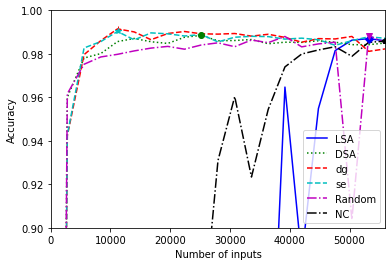

In [23]:
#adversarial jsma test set
#configuration 3
"""
6) Incremental guided retraining starting from the original model using only the new adversarial inputs.
Incremental training, starting with the previous trained model. Using at each iteration a subset of the new inputs.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.plot(n_inputs,accuracy_lsa_3,colors[0],linestyle=linestyles[0])
plt.plot(n_inputs,accuracy_dsa_3,colors[1],linestyle=linestyles[1])
plt.plot(n_inputs,accuracy_dg_3,colors[2],linestyle=linestyles[2])
plt.plot(n_inputs,accuracy_se_3,colors[3],linestyle=linestyles[3])
plt.plot(n_inputs,accuracy_random_3,colors[4],linestyle=linestyles[4])
plt.plot(n_inputs,accuracy_nc_3,colors[5],linestyle=linestyles[5])


legend_elements = [Line2D([0], [0], color=colors[0], label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color=colors[1], label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color=colors[2], label='dg',ls = linestyles[2]),
                   Line2D([0], [0], color=colors[3], label='se',ls = linestyles[3]),
                   Line2D([0], [0], color=colors[4], label='Random',ls = linestyles[4]),
                   Line2D([0], [0], color=colors[5], label='NC',ls = linestyles[5])]



plt.legend(handles=legend_elements)#
#plt.title("Accuracy")

print(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max())
print(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max())
print(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max())
print(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max())
print(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max())
print(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max())

plt.plot(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max(),'-bD',)
plt.plot(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max(),'-go')
plt.plot(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max(),'-r+')
plt.plot(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max(),'-c*')
plt.plot(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max(),'-mv')
plt.plot(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max(),'-kp')

plt.xlabel('Number of inputs')
plt.ylabel('Accuracy')
plt.xlim([0, len(x_train_and_adversary)])
plt.ylim([0.9, 1])

plt.savefig(save_dir+"/"+dataset+"_"+config_lc+"_"+"accuracy" + ".svg")

plt.show()

53200 0.9869999885559082
25200 0.9884999990463256
11200 0.9915000200271606
11200 0.9902856945991516
53200 0.9883571267127992
55998 0.9858571290969848


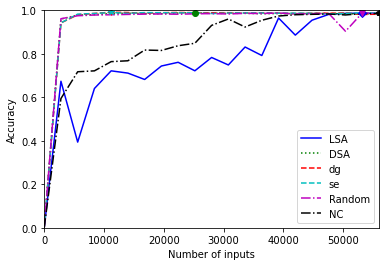

In [24]:
#adversarial jsma test set
#configuration 3
"""
6) Incremental guided retraining starting from the original model using only the new adversarial inputs.
Incremental training, starting with the previous trained model. Using at each iteration a subset of the new inputs.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.plot(n_inputs,accuracy_lsa_3,colors[0],linestyle=linestyles[0])
plt.plot(n_inputs,accuracy_dsa_3,colors[1],linestyle=linestyles[1])
plt.plot(n_inputs,accuracy_dg_3,colors[2],linestyle=linestyles[2])
plt.plot(n_inputs,accuracy_se_3,colors[3],linestyle=linestyles[3])
plt.plot(n_inputs,accuracy_random_3,colors[4],linestyle=linestyles[4])
plt.plot(n_inputs,accuracy_nc_3,colors[5],linestyle=linestyles[5])


legend_elements = [Line2D([0], [0], color=colors[0], label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color=colors[1], label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color=colors[2], label='dg',ls = linestyles[2]),
                   Line2D([0], [0], color=colors[3], label='se',ls = linestyles[3]),
                   Line2D([0], [0], color=colors[4], label='Random',ls = linestyles[4]),
                   Line2D([0], [0], color=colors[5], label='NC',ls = linestyles[5])]



plt.legend(handles=legend_elements)#
#plt.title("Accuracy")

print(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max())
print(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max())
print(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max())
print(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max())
print(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max())
print(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max())

plt.plot(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max(),'-bD',)
plt.plot(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max(),'-go')
plt.plot(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max(),'-r+')
plt.plot(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max(),'-c*')
plt.plot(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max(),'-mv')
plt.plot(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max(),'-kp')

plt.xlabel('Number of inputs')
plt.ylabel('Accuracy')
plt.xlim([0, len(x_train_and_adversary)])
plt.ylim([0, 1])

plt.savefig(save_dir+"/"+dataset+"_"+config_lc+"_"+"accuracy" + ".svg")

plt.show()